<a href="https://colab.research.google.com/github/thesarah0/PAPER-/blob/main/AWCCNet_Paper_code_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ AWCC-Net Evaluation - Official Code
This notebook evaluates crowd counting using AWCC-Net with the pretrained model on your own dataset.

In [ ]:
# ✅ Step 1: Clone AWCC-Net official repository
!git clone https://github.com/awccnet/AWCC-Net.git
%cd AWCC-Net


Cloning into 'AWCC-Net'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 25 (delta 6), reused 14 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 1.90 MiB | 23.14 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/AWCC-Net/AWCC-Net


In [ ]:
# ✅ Step 2: Install required packages
!pip install -r requirements.txt


In [ ]:
# ✅ Step 3: Upload your pretrained model (best.pth) manually
from google.colab import files
uploaded = files.upload()


Saving best.pth to best.pth


In [ ]:
# نقل ملف best.pth إلى داخل مجلد AWCC-Net
!mv best.pth /content/AWCC-Net/best.pth


In [ ]:
!ls /content/AWCC-Net


AWCC-Net  datasets  main.py  README.md
best.pth  images    models   requirements.txt


In [ ]:
from PIL import Image
import torch
from torchvision import transforms
from models.CC import CrowdCounter

# تحميل النموذج
model = CrowdCounter(None)
ckpt = torch.load('/content/AWCC-Net/best.pth', map_location=torch.device('cpu'))['state_dict']
model.load_state_dict(ckpt)
model.eval()

# تجهيز الصورة
image_path = "/content/1620_jpg.rf.8aad106842ba013eec6a0ce3a7980fcd.jpg"
img = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
img_tensor = transform(img).unsqueeze(0)

# التنبؤ#####
with torch.no_grad():
    output = model.test_forward(img_tensor)
    count = torch.sum(output).item()
    print(f"🧍‍♂️ Estimated Count: {int(count)}")


----------------------------------------
🧍‍♂️ Estimated Count: 80


----------------------------------------


/tmp/ipython-input-18-421554895.py:45: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


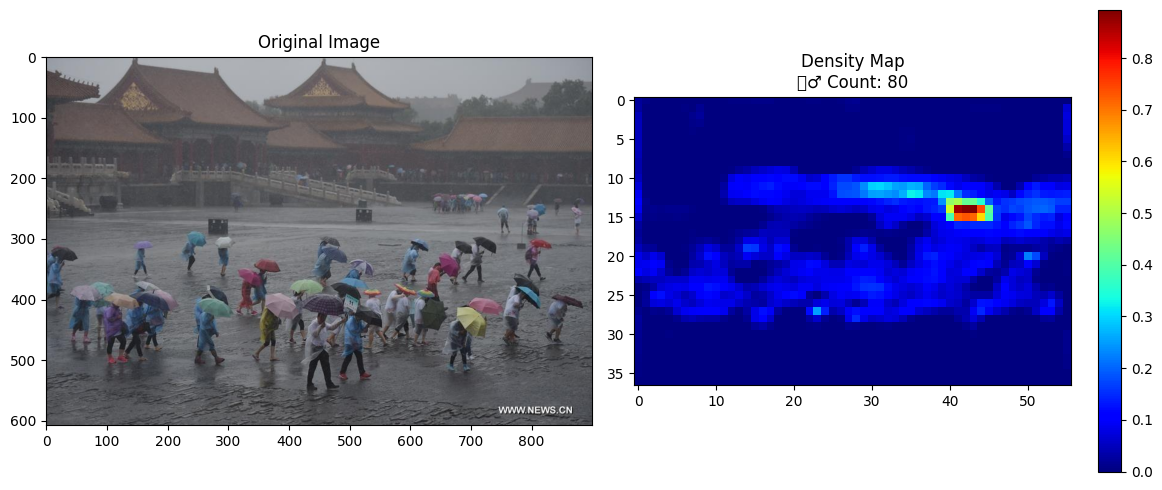

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
from models.CC import CrowdCounter

# تحميل النموذج
model = CrowdCounter(None)
ckpt = torch.load('/content/AWCC-Net/best.pth', map_location=torch.device('cpu'))['state_dict']
model.load_state_dict(ckpt)
model.eval()

# تجهيز الصورة
image_path = "/content/1620_jpg.rf.8aad106842ba013eec6a0ce3a7980fcd.jpg"
img = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
img_tensor = transform(img).unsqueeze(0)

# التنبؤ
with torch.no_grad():
    output = model.test_forward(img_tensor)
    count = torch.sum(output).item()

# عرض النتائج
density_map = output.squeeze().cpu().numpy()

plt.figure(figsize=(12, 5))

# الصورة الأصلية
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

# خريطة الكثافة
plt.subplot(1, 2, 2)
plt.imshow(density_map, cmap='jet')
plt.title(f"Density Map\n🧍‍♂️ Count: {int(count)}")
plt.colorbar()

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image
import torch
from torchvision import transforms
from models.CC import CrowdCounter

# تحميل النموذج على CPU
model = CrowdCounter(None)
ckpt = torch.load('/content/AWCC-Net/best.pth', map_location=torch.device('cpu'))['state_dict']
model.load_state_dict(ckpt)
model.eval()

# تحميل الصورة وتكبيرها (مثلاً 512 × 512)
image_path = "/content/0472_jpg.rf.898723e4c85140bd73db8429b9f2eb3e.jpg"  # ← غيري حسب الصورة
img = Image.open(image_path).convert('RGB')
print(f"📏 Original image size: {img.size}")
img = img.resize((512, 512))  # ← هذا هو الحل عشان نوقف الخطأ

# تجهيز الصورة
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
img_tensor = transform(img).unsqueeze(0)

# التنبؤ
with torch.no_grad():
    output = model.test_forward(img_tensor)
    count = torch.sum(output).item()
    print(f"🧍‍♂️ Estimated Count: {int(count)}")


----------------------------------------
📏 Original image size: (634, 444)
🧍‍♂️ Estimated Count: 25


/tmp/ipython-input-25-4261479673.py:22: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


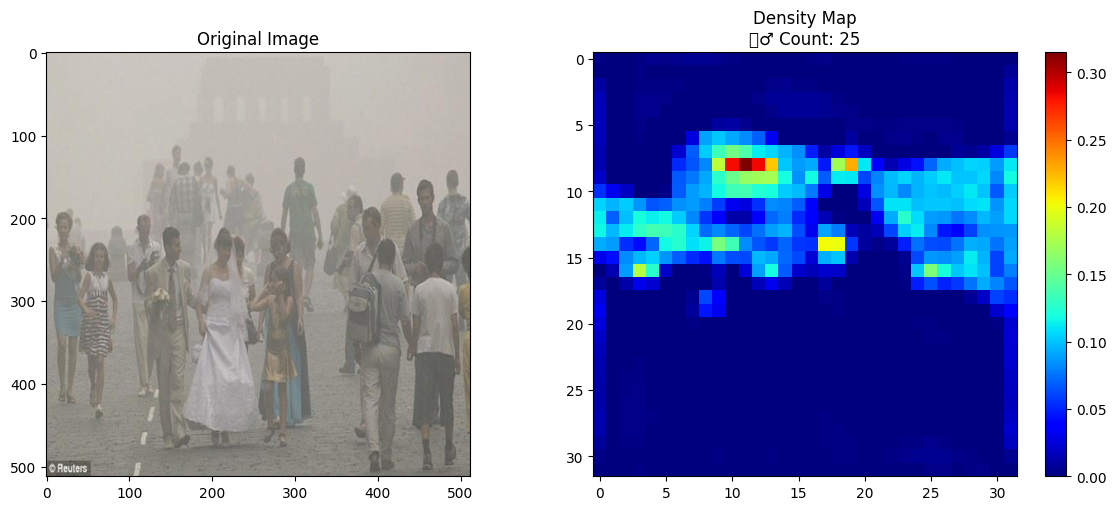

In [ ]:
# التنبؤ
with torch.no_grad():
    output = model.test_forward(img_tensor)
    count = torch.sum(output).item()

# عرض النتائج
density_map = output.squeeze().cpu().numpy()

plt.figure(figsize=(12, 5))

# الصورة الأصلية
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

# خريطة الكثافة
plt.subplot(1, 2, 2)
plt.imshow(density_map, cmap='jet')
plt.title(f"Density Map\n🧍‍♂️ Count: {int(count)}")
plt.colorbar()

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image
import torch
from torchvision import transforms
from models.CC import CrowdCounter

# تحميل النموذج
model = CrowdCounter(None)
ckpt = torch.load('/content/AWCC-Net/best.pth', map_location=torch.device('cpu'))['state_dict']
model.load_state_dict(ckpt)
model.eval()

# تجهيز الصورة
image_path = "/content/2672_jpg.rf.2d6113dfb3a0c6b46d2946109949758f.jpg"
img = Image.open(image_path).convert('RGB')
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])
img_tensor = transform(img).unsqueeze(0)

# التنبؤ#####
with torch.no_grad():
    output = model.test_forward(img_tensor)
    count = torch.sum(output).item()
    print(f"🧍‍♂️ Estimated Count: {int(count)}")

/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:07<00:00, 75.6MB/s]


----------------------------------------
🧍‍♂️ Estimated Count: 40


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
from models.CC import CrowdCounter

/tmp/ipython-input-12-4261479673.py:22: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


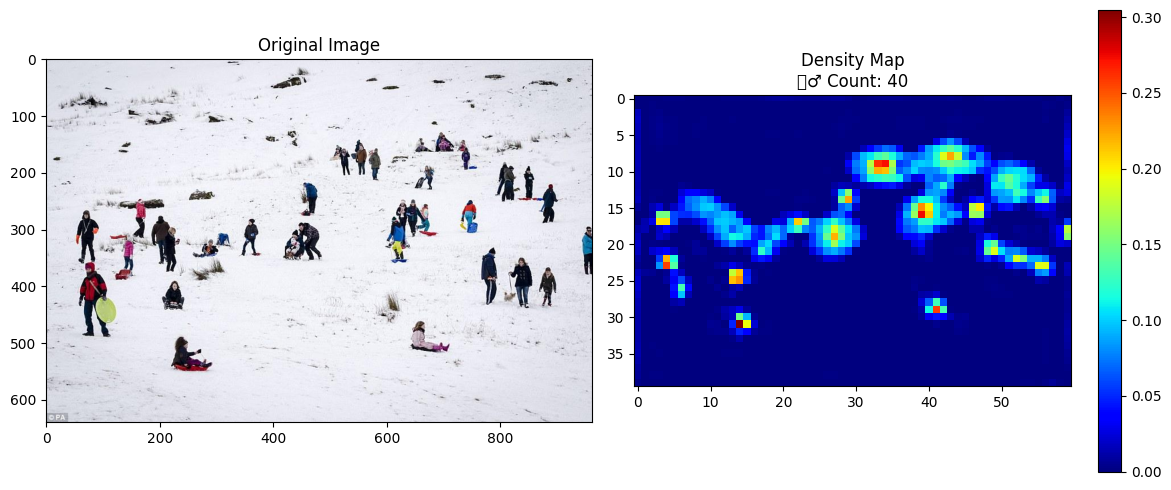

In [ ]:
# التنبؤ
with torch.no_grad():
    output = model.test_forward(img_tensor)
    count = torch.sum(output).item()

# عرض النتائج
density_map = output.squeeze().cpu().numpy()

plt.figure(figsize=(12, 5))

# الصورة الأصلية
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")

# خريطة الكثافة
plt.subplot(1, 2, 2)
plt.imshow(density_map, cmap='jet')
plt.title(f"Density Map\n🧍‍♂️ Count: {int(count)}")
plt.colorbar()

plt.tight_layout()
plt.show()